In [1]:
using Pkg
Pkg.activate("./")

using Base.Filesystem

# This is to read wav files.
# See: https://github.com/dancasimiro/WAV.jl
using WAV
using Plots

using Revise
using SpeechFeatures

  Activating environment at `~/Repositories/SpeechFeatures.jl/Project.toml`


Download an example audio file from the TIMIT 
corpus.

In [2]:
if ! isfile("LDC93S1.wav")
    run(`wget https://catalog.ldc.upenn.edu/desc/addenda/LDC93S1.wav`)
end

Load the audio file

sampling freq: 16000.0 Hz
duration: 2.92 s


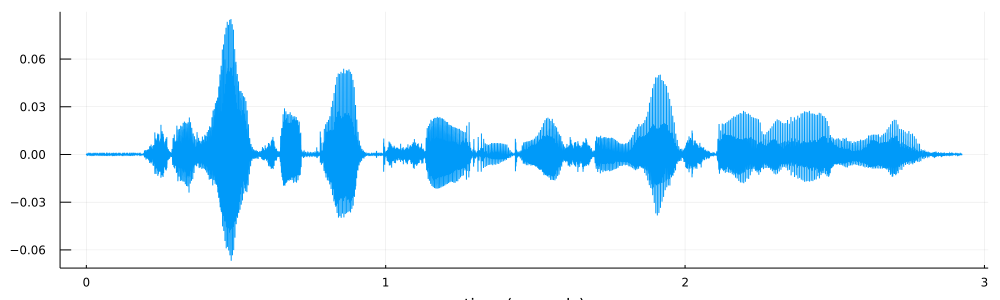

In [3]:
channels, srate = wavread("LDC93S1.wav", format="double")

# TIMIT data has only one channel (i.e. "mono") 
x = channels[:, 1]

println("sampling freq: $srate Hz\nduration: $(round(length(x) / srate, digits=2)) s")

t = range(0, length(x) / srate, length=length(x))
plot(t, x, size=(1000, 300), xlabel="time (seconds)", legend = false)

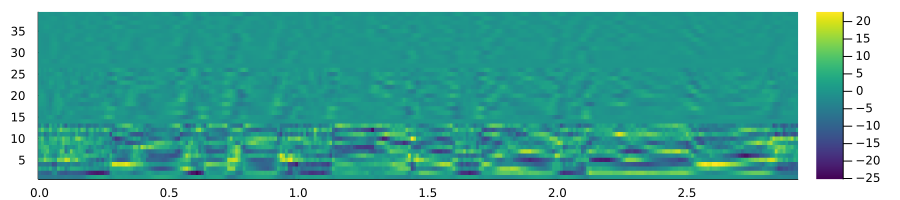

In [4]:
# Standard MFCC features 
mfcc = MFCC(srate = 16000)

# Add first and second order "derivatives" to the features
add_Δ_ΔΔ = DeltaCoeffs(order = 2) 

# Remove the utterance mean
mnorm = MeanNorm() 

fea = x |> mfcc |> add_Δ_ΔΔ |> mnorm

heatmap(
    Vector(range(0, length(x) / srate, length = size(fea, 2))),
    1:size(fea, 1),
    fea,
    size = (900, 200),
    c = :viridis
)